<a href="https://colab.research.google.com/github/ATsyganova/Data-Analytics-Projects/blob/main/%D0%90%D0%92_%D1%82%D0%B5%D1%81%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Принятие бизнес решений на основании анализа данных 

Имеются данные крупного интернет-магазина. Вместе с отделом маркетинга  подготовлен список гипотез для увеличения выручки.
В рамках проекта приоритизированы гипотезы, запущен A/B-тест и проанализированы результаты.

## Часть 1. Приоритизация гипотез.

Необходимо приоретизировать 9 гипотез по увеличению выручки интернет-магазина. Имеющиеся параметры: Reach, Impact, Confidence, Effort

In [ ]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt 

In [ ]:
#открываем 

url1 = "https://drive.google.com/file/d/.../view?usp=sharing"
url2 = "https://drive.google.com/file/d/.../view?usp=sharing"
url3 = "https://drive.google.com/file/d/.../view?usp=sharing"

hypothesis = pd.read_csv('https://drive.google.com/uc?id=' + url1.split('/')[-2])
orders = pd.read_csv('https://drive.google.com/uc?id=' + url2.split('/')[-2])
visitors = pd.read_csv('https://drive.google.com/uc?id=' + url3.split('/')[-2])

In [ ]:
# уберем ограничение на количество символов в строке, чтобы прочитать гипотезу полностью
pd.set_option('display.max_colwidth', -1)
# приведем названия столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
# посмотрим в итоге на таблицу
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### фреймворк ICE 

In [ ]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence']  / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE: 8, 0, 7

### фреймворк RICE

In [ ]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']  / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.200000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.125000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.333333
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.000000


Наиболее перспективные гипотезы по RICE: 7, 2, 0, 6

ВЫВОД

Гипотеза 
    "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"	
по всем параметрам приоритизации была высоко оценена, причем, метрика охвата reach = 10 - единственная максимальная оценка среди выдвигаемых гипотез. Благодаря этому данная гипотеза входит в топ-3 приоритизации ICE и возглавляет список RICE. 
Высокую приоритезацию по двум фреймворкам также имеет гипотеза 
    "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 
Поэтому, на эти две гипотезы стоит обратить внимание в первую очередь.


Гипотеза "Запустить акцию, дающую скидку на товар в день рождения", лидер приоритизации ICE, повлияет на очень малое кол-во пользователей (reach = 1), поэтому в фреймворке RICE гипотеза получила средний приоритет.

## Часть 2. Анализ A/B-теста

### 1.	график кумулятивной выручки по группам

In [ ]:
print('Общая информация о наборе данных \n')

def info(data):
  print('Размер таблицы: {}\n'.format(data.shape), '\n')
  #data.info()
  print('Количество пропусков: \n', data.isnull().sum(), '\n')
  print('Тип данных: \n', data.dtypes, '\n')
  display(data.sample(7, random_state=1))

info(orders)
info(visitors)

Общая информация о наборе данных 

Размер таблицы: (1197, 5)
 

Количество пропусков: 
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64 

Тип данных: 
 transactionId    int64 
visitorId        int64 
date             object
revenue          int64 
group            object
dtype: object 



,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A


Размер таблицы: (62, 3)
 

Количество пропусков: 
 date        0
group       0
visitors    0
dtype: int64 

Тип данных: 
 date        object
group       object
visitors    int64 
dtype: object 



,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490


In [ ]:
# приведем формат даты в порядок 

orders['date'] = pd.to_datetime(orders['date'])
print('Проверка типа данных orders[date]:', orders['date'].dtype)
visitors['date'] = pd.to_datetime(visitors['date'])
print('Проверка типа данных visitors[date]:',visitors['date'].dtype)

Проверка типа данных orders[date]: datetime64[ns]
Проверка типа данных visitors[date]: datetime64[ns]


In [ ]:
# проверим, попали ли пользователи в 2 группы одновременно
test = orders.groupby('visitorId', as_index=False).agg({'group': pd.Series.nunique}).query('group == 2')
test['visitorId'].count()

58

In [ ]:
# у нас 58 пользователей, которые попали в обе тестовые группы. Получим массив с их id 
id_error = test['visitorId'].values
id_error

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [ ]:
# удалим информацию о пользователях из датасета
orders = orders.query("visitorId not in @id_error")
print('Количество пользователей, попавших в обе группы одновременно: ', 
      orders.groupby('visitorId').agg({'group': pd.Series.nunique}).query('group == 2')['group'].count())

Количество пользователей, попавших в обе группы одновременно:  0


In [ ]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

#Соберём агрегированные кумулятивные по дням данные о заказах

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [ ]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [ ]:
# объединяем кумулятивные данные в одной таблице

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [ ]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [ ]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

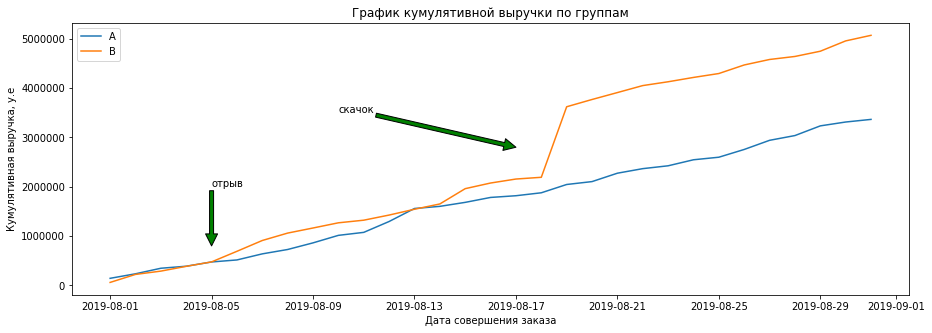

In [ ]:
# Строим график выручки групп
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title("График кумулятивной выручки по группам")
plt.xlabel("Дата совершения заказа")
plt.ylabel("Кумулятивная выручка, у.е")
plt.annotate('скачок', xy=('2019-08-17', 2800000), xytext=('2019-08-10', 3500000),
            arrowprops=dict(facecolor='g'))
plt.annotate('отрыв', xy=('2019-08-05', 800000), xytext=('2019-08-05', 2000000),
            arrowprops=dict(facecolor='g')) 
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. 
Однако график выручки группы В имеет точку резкого роста. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### 2. график кумулятивного среднего чека по группам

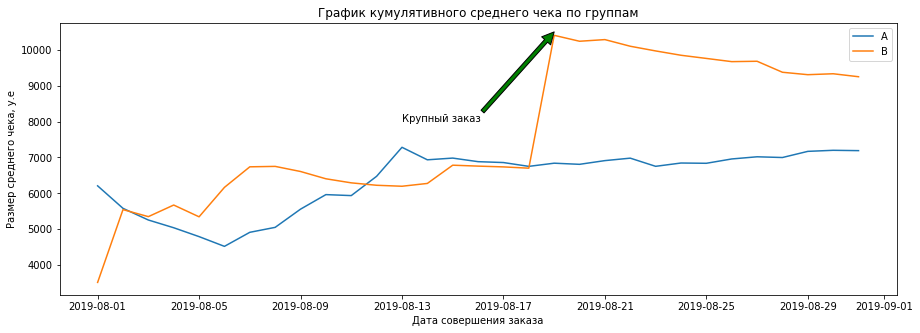

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title("График кумулятивного среднего чека по группам")
plt.xlabel("Дата совершения заказа")
plt.ylabel("Размер среднего чека, у.е")
plt.annotate('Крупный заказ', xy=('2019-08-19', 10500), xytext=('2019-08-13', 8000),
            arrowprops=dict(facecolor='g'))
plt.legend()
plt.show()

Резкий рост графика группы В подтверждает предположении о попадании в выборку крупных заказов. Чтобы прийти к реальному среднему чеку и установиться на его уровне, было бы хорошо получить больше данных.

Можно считать, что среднее значение чека для группы А установилось (хотя и наблюдается небольшая тенденция к росту)

### 3. график относительного изменения кумулятивного среднего чека группы B к группе A

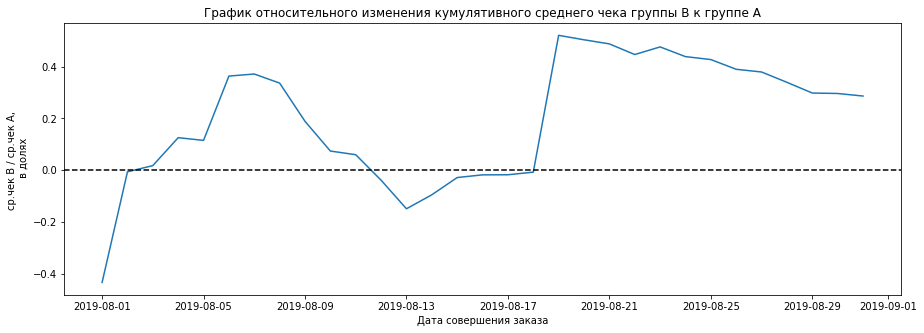

In [ ]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title("График относительного изменения кумулятивного среднего чека группы B к группе A")
plt.xlabel("Дата совершения заказа")
plt.ylabel("ср.чек B / ср.чек A, \n в долях")
plt.show()



Однозначного вывода сделать нельзя, поскольку характер графика сильно меняется со временем из-за наличия выбросов

### 4. график кумулятивной конверсии по группам

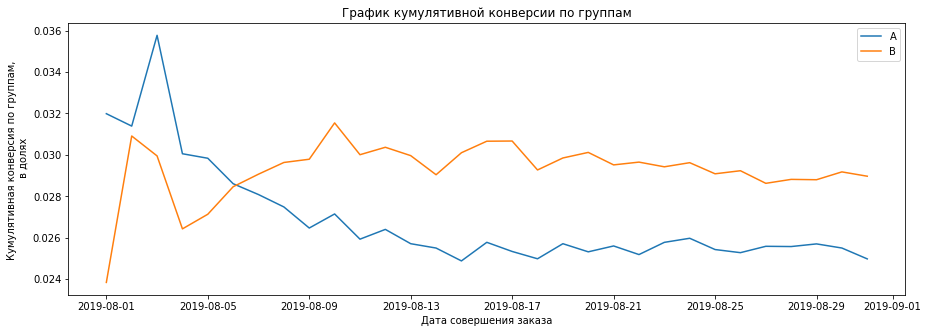

In [ ]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title("График кумулятивной конверсии по группам")
plt.xlabel("Дата совершения заказа")
plt.ylabel("Кумулятивная конверсия по группам, \n в долях")
plt.show()

Кумулятивная конверсия группы В, в целом, зафиксировалась на более высоких значениях, чем для группы А. Однако, замечаем еще некоторые колебания значений, не влияющие на общий вывод

### 5. график относительного изменения кумулятивной конверсии группы B к группе A

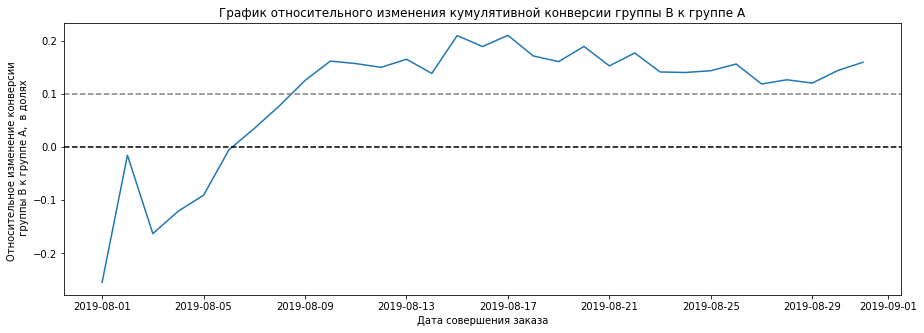

In [ ]:
# объединим таблицы
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
# строим графики
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
         )


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')

plt.title("График относительного изменения кумулятивной конверсии группы B к группе A")
plt.xlabel("Дата совершения заказа")
plt.ylabel("Относительное изменение конверсии \n группы B к группе A,  в долях")
plt.show()

В первые дни теста происходили резкие взлеты и падения, однако после 4 дней наблюдений группа В однозначно выигрывает у группы А. Как и в предыдущем выводе, об окончательных значениях пока еще рано говорить, поскольку на графике наблюдаются колебания значений.

### 6. точечный график количества заказов 

In [ ]:
# количество заказов по пользователям
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['userId', 'orders']

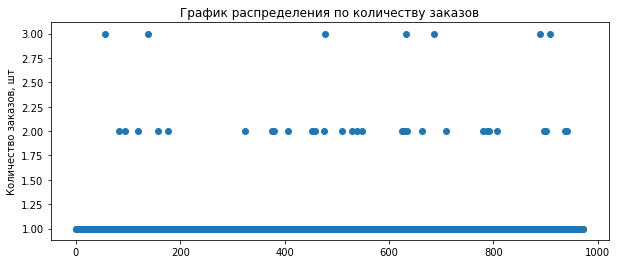

In [ ]:
# Построим точечную диаграмму числа заказов на одного пользователя
plt.figure(figsize=(10, 4))
plt.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders']) 
plt.title("График распределения по количеству заказов")
plt.ylabel("Количество заказов, шт")
plt.show() 

Чаще всего пользователи совершали 1-2 заказов

### 7. 95-й и 99-й перцентили количества заказов на пользователя. 

Выберите границу для определения аномальных пользователей.

In [ ]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Отсечем 1% самых активных пользователей и будем считать аномалиями количество заказов, большее 2. Иначе мы не сможем определить, что кратность заказов хоть сколько-то увеличилась

### 8. точечный график стоимостей заказов

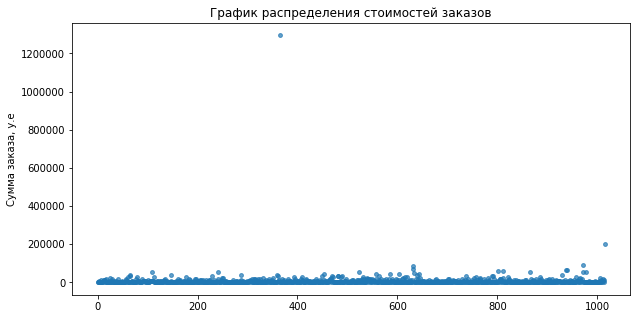

count    1.016000e+03
mean     8.300815e+03
std      4.212199e+04
min      5.000000e+01
25%      1.190000e+03
50%      2.955000e+03
75%      8.134250e+03
max      1.294500e+06
Name: revenue, dtype: float64

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue'], alpha=0.7, s=15) 
plt.title("График распределения стоимостей заказов")
plt.ylabel("Сумма заказа, у.е")
plt.show()  

orders['revenue'].describe()

Есть 1 очень большой выброс (1.29 млн) из-за чего значения на графике сливаются и понять, на какую сумму чаще всего совершали заказы, нельзя. 
Посмотрим по перцентилям.


### 9. Посчитайте 95-й и 99-й перцентили стоимости заказов

Выберите границу для определения аномальных пользователей.

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Также отсечем 5% самых "дорогих" заказов и установим порог в 26 785.

### 10.	статистическая значимость различий в конверсии между группами по «сырым» данным

In [ ]:
# посетителей из группы А
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

# посетителей из группы В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# количество пользователей до выбранной даты включительно в группе B
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# количество уникальных пользователей и выручка по группе А по дням
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# суммарная выручка в выбранную дату в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

# количество уникальных пользователей и выручка по группе В по дням
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'visitorId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# суммарная выручка в выбранную дату в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]


# объединяем все в один датафрейм data
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
display(data.head(10))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,19,142779,17,59758,19,142779,17,59758,719,713,719,713
1,2019-08-02,18,91602,22,162043,37,234381,39,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,61,346854,53,288850,507,509,1845,1803
3,2019-08-04,11,41176,13,96890,72,388030,66,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,94,474413,87,475648,756,707,3318,3280
5,2019-08-06,12,40919,22,214842,106,515332,109,690490,667,655,3985,3935
6,2019-08-07,16,123248,23,219164,122,638580,132,909654,644,709,4629,4644
7,2019-08-08,14,88639,22,150141,136,727219,154,1059795,610,654,5239,5298
8,2019-08-09,11,134237,19,103166,147,861456,173,1162961,617,610,5856,5908
9,2019-08-10,15,152275,22,105162,162,1013731,195,1268123,406,369,6262,6277


In [ ]:
#определим кол-во заказов для пользователей из исследуемых групп

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [ ]:
# не забудем про пользователей, которые не заказали ничего
# sampleA/B = клиенты из каждой группы + пользователи без заказов

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


* Нулевая гипотеза: конверсии групп А и В сопоставимы
* Обратная гипотеза: между конверсиями групп А и В существует статистически значимое различие.

In [ ]:
alpha = 0.05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

print('Статистическая значимость различий в конверсии между группами (тест Манна-Уитни): p-value = {0:.3f}'. 
      format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))

if stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1] < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп А и В существует статистически значимое различие')
else:
    print('Нулевая гипотеза верна: конверсии групп А и В сопоставимы') 

# Чтобы получить конверсию в группе, поделим сумму заказов на число пользователей — найдём среднее в выборках sample
print("Относительный прирост конверсии группы B: {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость различий в конверсии между группами (тест Манна-Уитни): p-value = 0.011
Отвергаем нулевую гипотезу: между конверсиями групп А и В существует статистически значимое различие
Относительный прирост конверсии группы B: 16.0%


### 11. статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

* Нулевая гипотеза: средние чеки групп А и В сопоставимы
* Обратная гипотеза: различие между размером среднего чека групп А и В статистически значимо

In [ ]:

print('Статистическая значимость различий в среднем чеке заказа между группами (тест Манна-Уитни): p-value = {0:.3f}'. format(
      stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                         alternative = 'two-sided')[1]))

if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], 
                      alternative = 'two-sided')[1] < alpha:
    print('Отвергаем нулевую гипотезу: различие между размером среднего чека групп А и В статистически значимо')
else:
    print('Нулевая гипотеза верна: средние чеки групп А и В сопоставимы') 

print('Относительный прирост среднего чека группы B: {0:.1%}'.format(
    orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

Статистическая значимость различий в среднем чеке заказа между группами (тест Манна-Уитни): p-value = 0.829
Нулевая гипотеза верна: средние чеки групп А и В сопоставимы
Относительный прирост среднего чека группы B: 28.7%


### 12. статистическая значимость различий в конверсии между группами по «очищенным» данным


In [ ]:
# очень автивные пользователи
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
# пользователи с большими чеками в истории заказов
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [ ]:
# в sampleAFiltered и sampleBFiltered будут лежать очищенные данные о заказах — не включая аномальных пользователей

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

* Нулевая гипотеза: конверсии групп А и В сопоставимы
* Обратная гипотеза: между конверсиями групп А и В существует статистически значимое различие.

In [ ]:
print('Статистическая значимость различий в конверсии между группами по очищенным данным (тест Манна-Уитни): p-value = {0:.3f}'.format(
      stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))

if stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1] < alpha:
    print('Отвергаем нулевую гипотезу: между конверсиями групп А и В существует статистически значимое различие')
else:
    print('Нулевая гипотеза верна: конверсии групп А и В сопоставимы') 

print('Относительное различие в конверсии между группами по очищенным данным: {0:.1%}'.format(
    sampleBFiltered.mean()/sampleAFiltered.mean()-1))

Статистическая значимость различий в конверсии между группами по очищенным данным (тест Манна-Уитни): p-value = 0.012
Отвергаем нулевую гипотезу: между конверсиями групп А и В существует статистически значимое различие
Относительное различие в конверсии между группами по очищенным данным: 18.2%


Нулевая гипотеза все также отвергнута. Статистическая значимость отличий выборок подтверждена на очищенных данных. А отличие группы В стало еще весомее: +18.9%

### 13. статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

* Нулевая гипотеза: средние чеки групп А и В сопоставимы
* Обратная гипотеза: различие между размером среднего чека групп А и В статистически значимо

In [ ]:
result_receipt = stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'], alternative = 'two-sided',
        )[1]

print('Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным (тест Манна-Уитни): p-value =  {0:.3f}'.
      format(result_receipt))


if result_receipt < 0.01:
    print('Отвергаем нулевую гипотезу: различие между размером среднего чека групп А и В по очищенным данным статистически значимо')
else:
    print('Нулевая гипотеза верна: средние чеки групп А и В по очищенным данным сопоставимы') 

print('Относительный прирост среднего чека группы B (по очищенным данным): {0:.1%}'.format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным (тест Манна-Уитни): p-value =  0.646
Нулевая гипотеза верна: средние чеки групп А и В по очищенным данным сопоставимы
Относительный прирост среднего чека группы B (по очищенным данным): -4.8%


После удаления слишком больших, во всех смыслах, заказов, статистическая значимость в чеках между группами также не обнаружено, а средний чек в группе В стал ниже, чем в А на 4.8%. 

**ВЫВОД**

**Приоретизация гипотез**

Наиболее перспективными можно назвать гипотезы: 

    "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"	
    "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". 

Данные гипотезы были высоко оценены по всем параметрам сравнения: охват, влияние на потребителя, уверенность в результате проводимых преобразований, простота проверки и стали лидерами по двум моделям приоретизации (ICE и RICE). 


**Анализ A/B-теста**

Перед проведением анализа данные теста были предобработаны:

- в данных отсутствуют пропуски, проверены и исправлены типы данных
- удалена информация о пользователях, попавших в обе исследуемые группы

Анализ результатов проведен на всем массиве данных и данных, очищенных от выбросов:

- не учитывались очень большие заказы с чеком свыше 26 785 рублей (5% наблюдений с крайними значениями)
- совершение более 2 заказов одним пользователем (1% наблюдений с крайними значениями)

Изменение конверсии между группами оказалось статистически значимым, относительный прирост в группе В составил +16% на "сырых"данных и +18.2% на "очищенных". То есть, в группе В посетители становились клиентами чаще, что является важной метрикой для бизнеса. И кажется, результат произведенных изменений хороший.

Статистически значимой разницы в среднем чеке между группами не обраружено, а относительное изменение в группе В после очистки данных от выбросов составило -4.8%. С другой стороны, пусть клиенты и стали покупать чуточку меньше, но стали это делать чаще!

Таким образом, считаю, что тест можно остановить и зафиксировать победу группы В.